# Image Generation with MLX Server

This notebook demonstrates how to use the MLX Server with OpenAI-compatible API for image generation tasks using the `/v1/images/generations` endpoint.


## Setup and Imports

First, we'll import the necessary libraries and establish a connection to the MLX Server.


In [21]:
# Import the OpenAI client for API communication
from openai import OpenAI

# Connect to the local MLX Server with OpenAI-compatible API
client = OpenAI(
    base_url="http://localhost:8000/v1",
    api_key="fake-api-key",
)

In [20]:
# Required for image processing and display
import base64
from io import BytesIO

from IPython.display import display
from PIL import Image

## Helper Functions


In [15]:
def display_image_from_b64(b64_json):
    """
    Display an image from base64-encoded JSON data.

    Args:
        b64_json: Base64-encoded image data
    """
    # Decode the base64 string
    image_data = base64.b64decode(b64_json)

    # Convert to PIL Image
    image = Image.open(BytesIO(image_data))

    # Display the image
    display(image)

    return image

## Example 1: Basic Image Generation

Let's start with a simple image generation request using the default parameters.


Generated image:


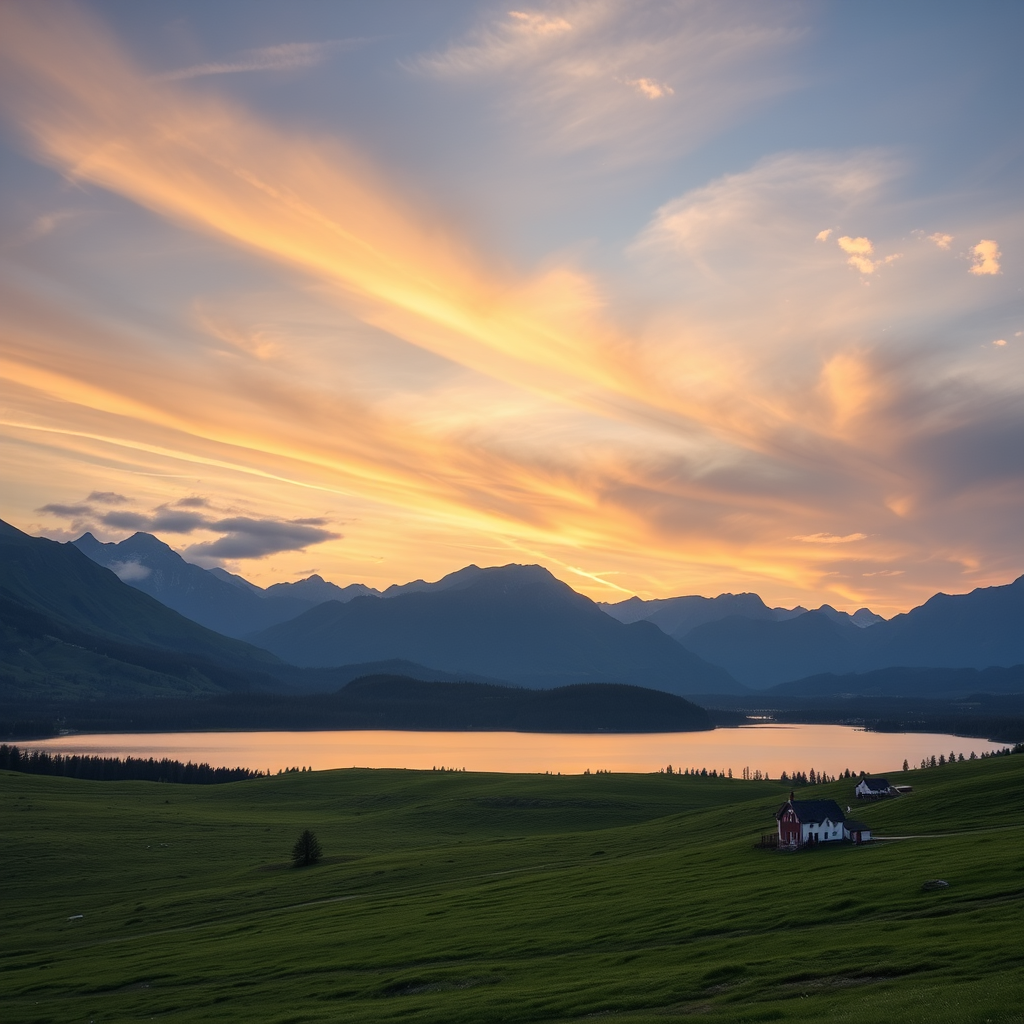

Image created at: 1752328190


In [17]:
# Basic image generation request
response = client.images.generate(
    prompt="A serene landscape with mountains and a lake at sunset",
    model="local-image-generation-model",
    size="1024x1024",
    n=1,
)

# Display the generated image
print("Generated image:")
image = display_image_from_b64(response.data[0].b64_json)
print(f"Image created at: {response.created}")

## Example 2: Image Generation with Custom Parameters

Now let's generate an image with custom parameters including negative prompts and specific inference steps.


Generated image:


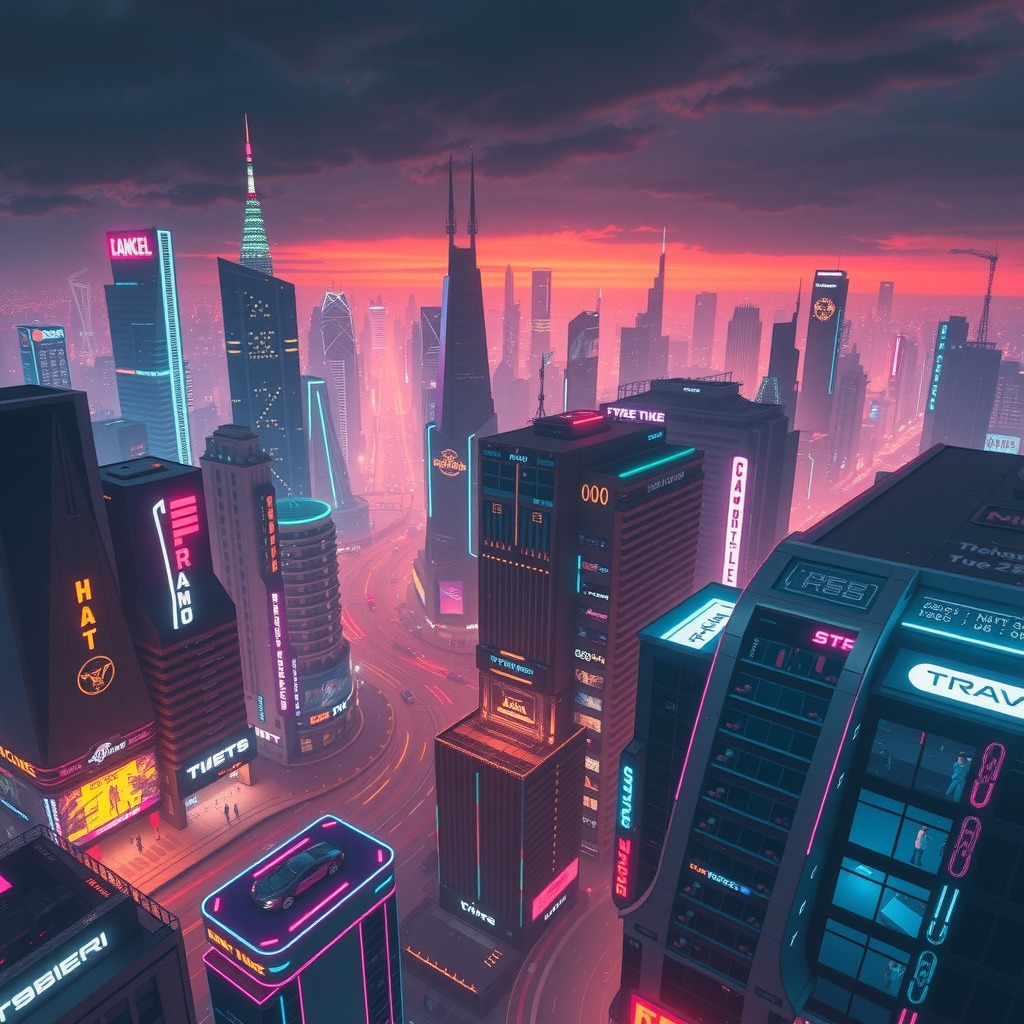

Image created at: 1752328315


In [19]:
# Make the API request
response = client.images.generate(
    prompt="A beautiful cyberpunk city at night with neon lights and flying cars",
    model="local-image-generation-model",
    size="1024x1024",
    extra_body={"steps": 8, "seed": 0},
)

# Display the generated image
print("Generated image:")
image = display_image_from_b64(response.data[0].b64_json)
print(f"Image created at: {response.created}")

## Summary

This notebook demonstrated various aspects of the `/v1/images/generations` endpoint:

1. **Basic image generation** with default parameters
2. **Custom parameters** including negative prompts and inference steps

### Key Parameters:
- `prompt`: Text description of the desired image (required)
- `model`: Model to use (defaults to "local-image-generation-model")
- `size`: Image dimensions ("256x256", "512x512", "1024x1024")
- `steps`: Number of inference steps (1-50, default: 4)
- `seed`: For reproducible generation


### Usage Notes:
- The endpoint requires an image generation model type (`--model-type image-generation`)
- Images are returned as base64-encoded JSON data
- Higher step counts generally produce better quality but take longer
- Using the same seed with identical parameters produces identical results
- The API follows OpenAI's image generation format

### Starting the Server:
To run the server with image generation capabilities, use:
```bash
python -m app.main --model-type image-generation --model-name schnell
```

Available model names: `dev`, `schnell`.